## DATA ANALYSIS ON BLINKIT ##

## **Import libraries**

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **Import Raw Data**

In [11]:
df=pd.read_csv("C:/Users/rahul/Desktop/project/blinkit analysis/BlinkIT-Grocery-Data.csv")

## **Sample Data**

In [12]:
df.head(15)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2014,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


## **Size Of Data**

In [15]:
print("Size of the data:",df.shape)

Size of the data: (8523, 12)


## **Field Info**

In [18]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

## **Datatypes**

In [19]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

## **Data cleaning using replace method**

In [24]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [27]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat',
                                                       'reg':'Regular'})

In [28]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### **BUSINESS REQUIREMENTS**

### **KPI's REQUIREMENTS**

In [31]:
#Total Sales
total_sales=df['Sales'].sum()

#AVG Sales
avg_sales=df['Sales'].mean()

#NO. of Items sold
no_of_items_sold=df['Sales'].count()

#AVG Ratings
avg_ratings=df['Rating'].mean()

#display
print(f"Total Sales: ${total_sales:,.1f}")
print(f"AVG Sales: ${avg_sales:,.1f}")
print(f"NO. of Items sold: {no_of_items_sold:,.1f}")
print(f"AVG Ratings: {avg_ratings:,.1f}")

Total Sales: $1,201,681.5
AVG Sales: $141.0
NO. of Items sold: 8,523.0
AVG Ratings: 4.0


### **CHARTS REQUIREMENTS**

#### Total Sales by Fat Content

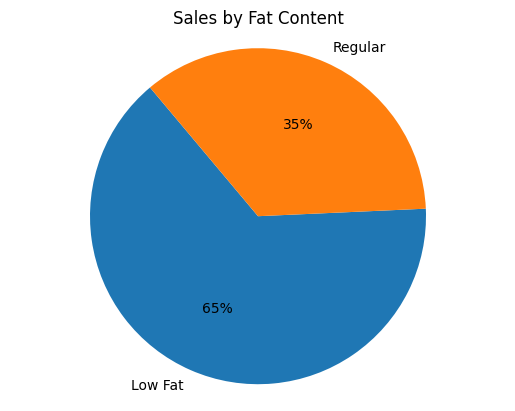

In [39]:
sales_by_fat =df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index,
          autopct= '%.0f%%',startangle=130)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

#### **Total Sales by Items Type**

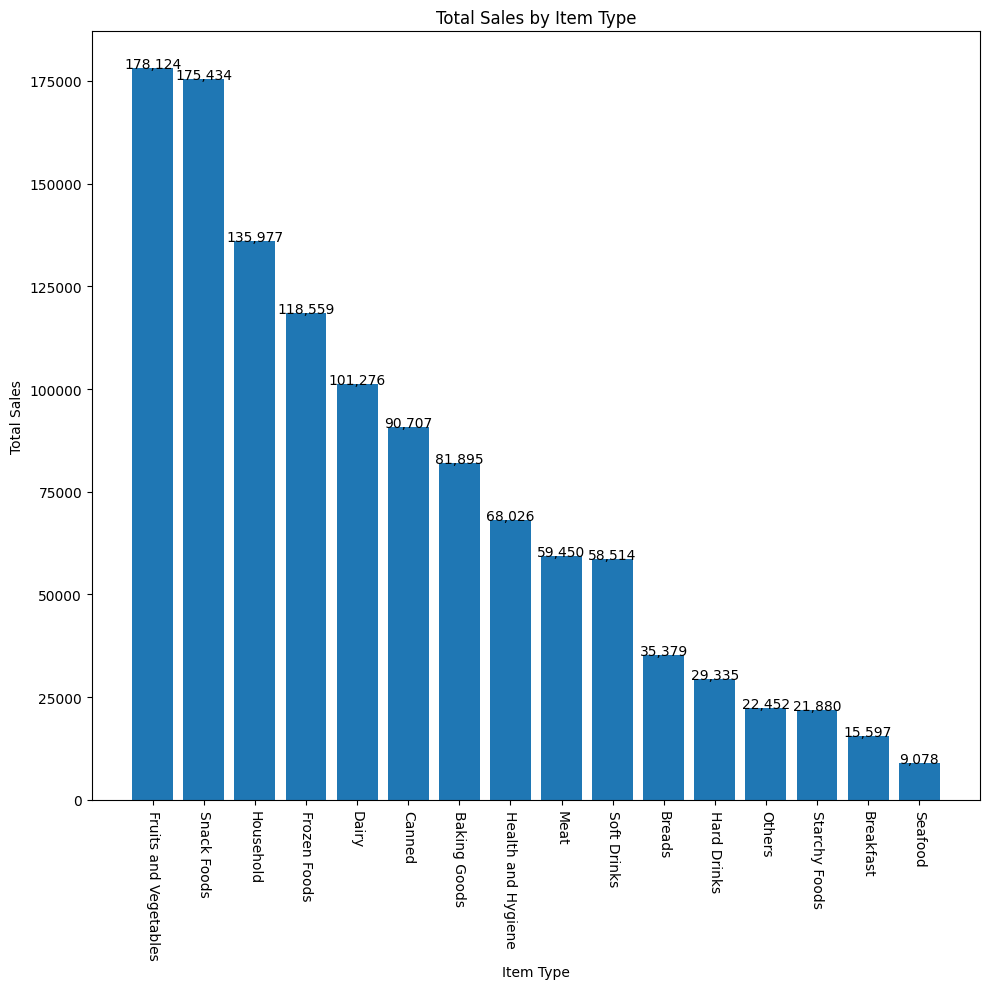

In [42]:
sales_by_type =df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,10))
bars=plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,bar.get_height(),
             f'{bar.get_height():,.0f}',ha='center' , fontsize=10)
plt.tight_layout()
plt.show()

#### **Fat Content by Outlet for Total Sales**

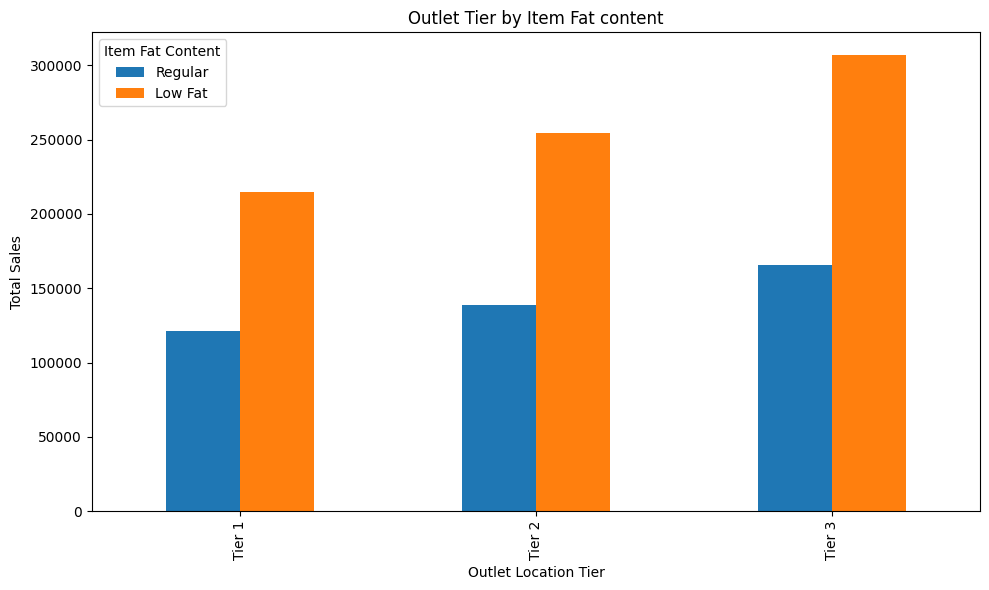

In [44]:
grouped= df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped=grouped[['Regular','Low Fat']]

axx=grouped.plot(kind='bar',figsize=(10,6), title='Outlet Tier by Item Fat content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

#### **Total Sales by Outlet Establishment**

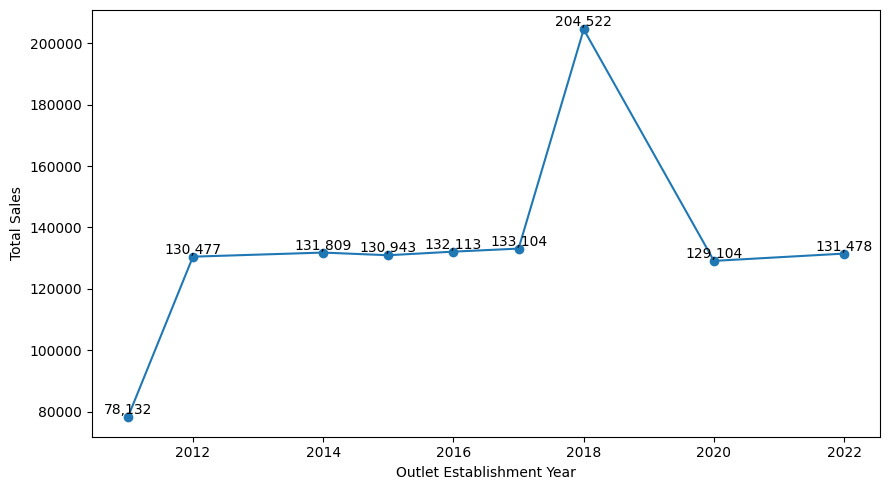

In [46]:
sales_by_year= df.groupby(['Outlet Establishment Year'])['Sales'].sum().sort_index()
plt.figure(figsize=(9,5))

plt.plot(sales_by_year.index, sales_by_year.values,marker='o',linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title=('Outlet Establishment')

for x,y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x,y,f'{y:,.0f}',ha='center' ,va='bottom' ,fontsize=10)
    
plt.tight_layout()
plt.show()

#### **Sales by Outlet Size**

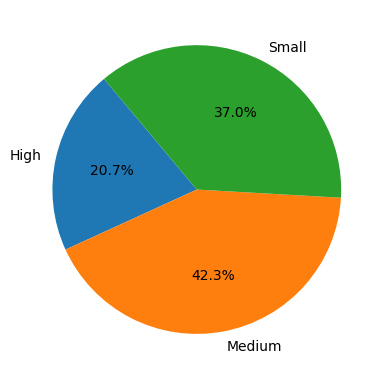

In [50]:
sales_by_size =df.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels = sales_by_size.index,
          autopct= '%1.1f%%',startangle=130)


plt.tight_layout()
plt.show()

#### **Sales by Outlet Location**

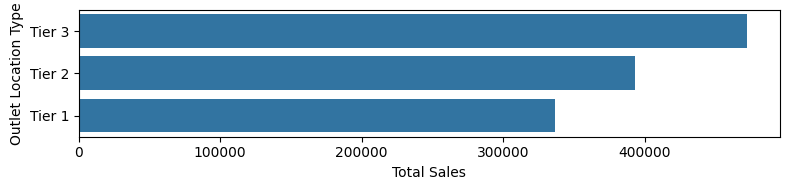

In [54]:
sales_by_location = df.groupby(['Outlet Location Type'])['Sales'].sum().reset_index()
sales_by_location=sales_by_location.sort_values('Sales',ascending=False)
plt.figure(figsize=(8,2))
ax=sns.barplot(x='Sales',y='Outlet Location Type', data=sales_by_location)


plt.ylabel('Outlet Location Type')
plt.xlabel('Total Sales')

plt.tight_layout()
plt.show()